<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/Lab_11_Decisi%C3%B3n_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees para Predecir la Medicina Correcta
## [MSc: Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)




En este laboratorio, aprenderá un popular algoritmo de aprendizaje automático, el árbol de decisiones. Utilizará este algoritmo de clasificación para construir un modelo a partir de datos históricos de pacientes y su respuesta a diferentes medicamentos. Luego, utiliza el árbol de decisiones capacitado para predecir la clase de un paciente desconocido o para encontrar un medicamento adecuado para un nuevo paciente.
# Tabla de contenidos
1. Sobre el dataset
2. descargar la data
3. Pre-procesamiento
4. Modelado
5. Predicción
6. Evaluación
7. Visualización

# 1. importar las librerías Necesarias

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Sobre el Dataset
Imagine que es un investigador médico que recopila datos para un estudio. Ha recopilado datos sobre un conjunto de pacientes, todos los cuales padecían la misma enfermedad. Durante el curso de su tratamiento, cada paciente respondió a uno de los 5 medicamentos, medicamento A, medicamento B, medicamento c, medicamento x e y.

Parte de su trabajo consiste en crear un modelo para averiguar qué fármaco podría ser apropiado para un futuro paciente con la misma enfermedad. Los conjuntos de características de este conjunto de datos son la edad, el sexo, la presión arterial y el colesterol de los pacientes, y el objetivo es el fármaco al que respondió cada paciente.

Es una muestra de clasificador binario, y puede usar la parte de entrenamiento del conjunto de datos para construir un árbol de decisiones y luego usarlo para predecir la clase de un paciente desconocido o prescribirlo a un nuevo paciente.


# 2. Cargando o descargando la data

In [ ]:
df = pd.read_csv("drug200.csv")

In [ ]:
df[0:5]

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [ ]:
df.size

1200

In [ ]:
df.shape

(200, 6)

In [ ]:
df

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

# 3. Pre_procesamiento
Usando df como los datos de Drug.csv leídos por los pandas, declare las siguientes variables:
*  X como la matriz de características (datos de df) 
* y como vector de respuesta (objetivo)

Elimine la columna que contiene el nombre del objetivo, ya que no contiene valores numéricos.



In [ ]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Como puede ver, algunas características de este conjunto de datos son categóricas, como Sexo o BP. Desafortunadamente, los árboles de decisión de Sklearn no manejan variables categóricas. Pero aún podemos convertir estas características en valores numéricos. pandas.get_dummies () Convierte la variable categórica en variables ficticias / indicadoras.

In [ ]:
df.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

ahora podemos completar la variable destino

In [ ]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

# 4. Configurar el árbol de decisiones
Usaremos la división de train/ test en nuestro árbol de decisiones. Vamos a importar train_test_split de sklearn.cross_validation.

In [ ]:
from sklearn.model_selection import train_test_split

Ahora train_test_split devolverá 4 parámetros diferentes. Los nombraremos:
X_trainset, X_testset, y_trainset, y_testset

El train_test_split necesitará los parámetros:
X, y, test_size = 0.3 y random_state = 3.

X e y son las matrices requeridas antes de la división, test_size representa la proporción del conjunto de datos de prueba y random_state asegura que obtengamos las mismas divisiones.

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Práctica

In [ ]:
# Tarea 
# Imprima la forma de X_trainset y y_trainset. Asegúrese de que las dimensiones coincidan
print ('X_trainset')
print('y_trainset')


X_trainset
y_trainset


In [ ]:
# Imprima la forma de X_testset y y_testset. Asegúrese de que las dimensiones coincidan


# 5. Modelado
Primero crearemos una instancia de DecisionTreeClassifier llamada drugTree.
Dentro del clasificador, especifique criterio = "entropía" para que podamos ver la ganancia de información de cada nodo.

In [ ]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth= 4)
drugTree # mostrar los parametros predeterminados 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

A continuación, ajustaremos los datos con la matriz de funciones de entrenamiento X_trainset y el vector de respuesta de entrenamiento y_trainset

In [ ]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# 6. Predicción
Hagamos algunas prediciones en el dataset de testing y almacenamos en una variable llamada predTree

```
# Tiene formato de código
```



In [ ]:
predTree=drugTree.predict(X_testset)

Puede imprimir predTree y y_testset si desea comparar visualmente la predicción con los valores reales

In [ ]:
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


# 7. Evaluación
Acontinuación importemos métricas de sklearn y verificamos la precision (accuracy) de nuestro modelo 

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print('DecisionTrees Accuracy: ', metrics.accuracy_score(y_testset, predTree))

DecisionTrees Accuracy:  0.9833333333333333


La puntuación de la clasificación de precisión calcula la precisión del subconjunto: el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto de etiquetas correspondiente en y_true.

En la clasificación de etiquetas múltiples, la función devuelve la precisión del subconjunto. Si todo el conjunto de etiquetas predichas para una muestra coincide estrictamente con el conjunto verdadero de etiquetas, entonces la precisión del subconjunto es 1.0; de lo contrario, es 0.0.

# Practice
Puede calcular el accuracy score sin sklearn?

In [ ]:
#Tu codigo

# 8. Visualization 
visualizamos el arbol


In [ ]:
# Aviso: es posible que deba descomentar e instalar las bibliotecas pydotplus y graphviz si no las ha instalado antes
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

/bin/bash: conda: command not found
/bin/bash: conda: command not found


In [ ]:
!pip install --upgrade scikit-learn==0.20.3
import six
import sys
sys.modules['sklearn.externals.six'] = six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

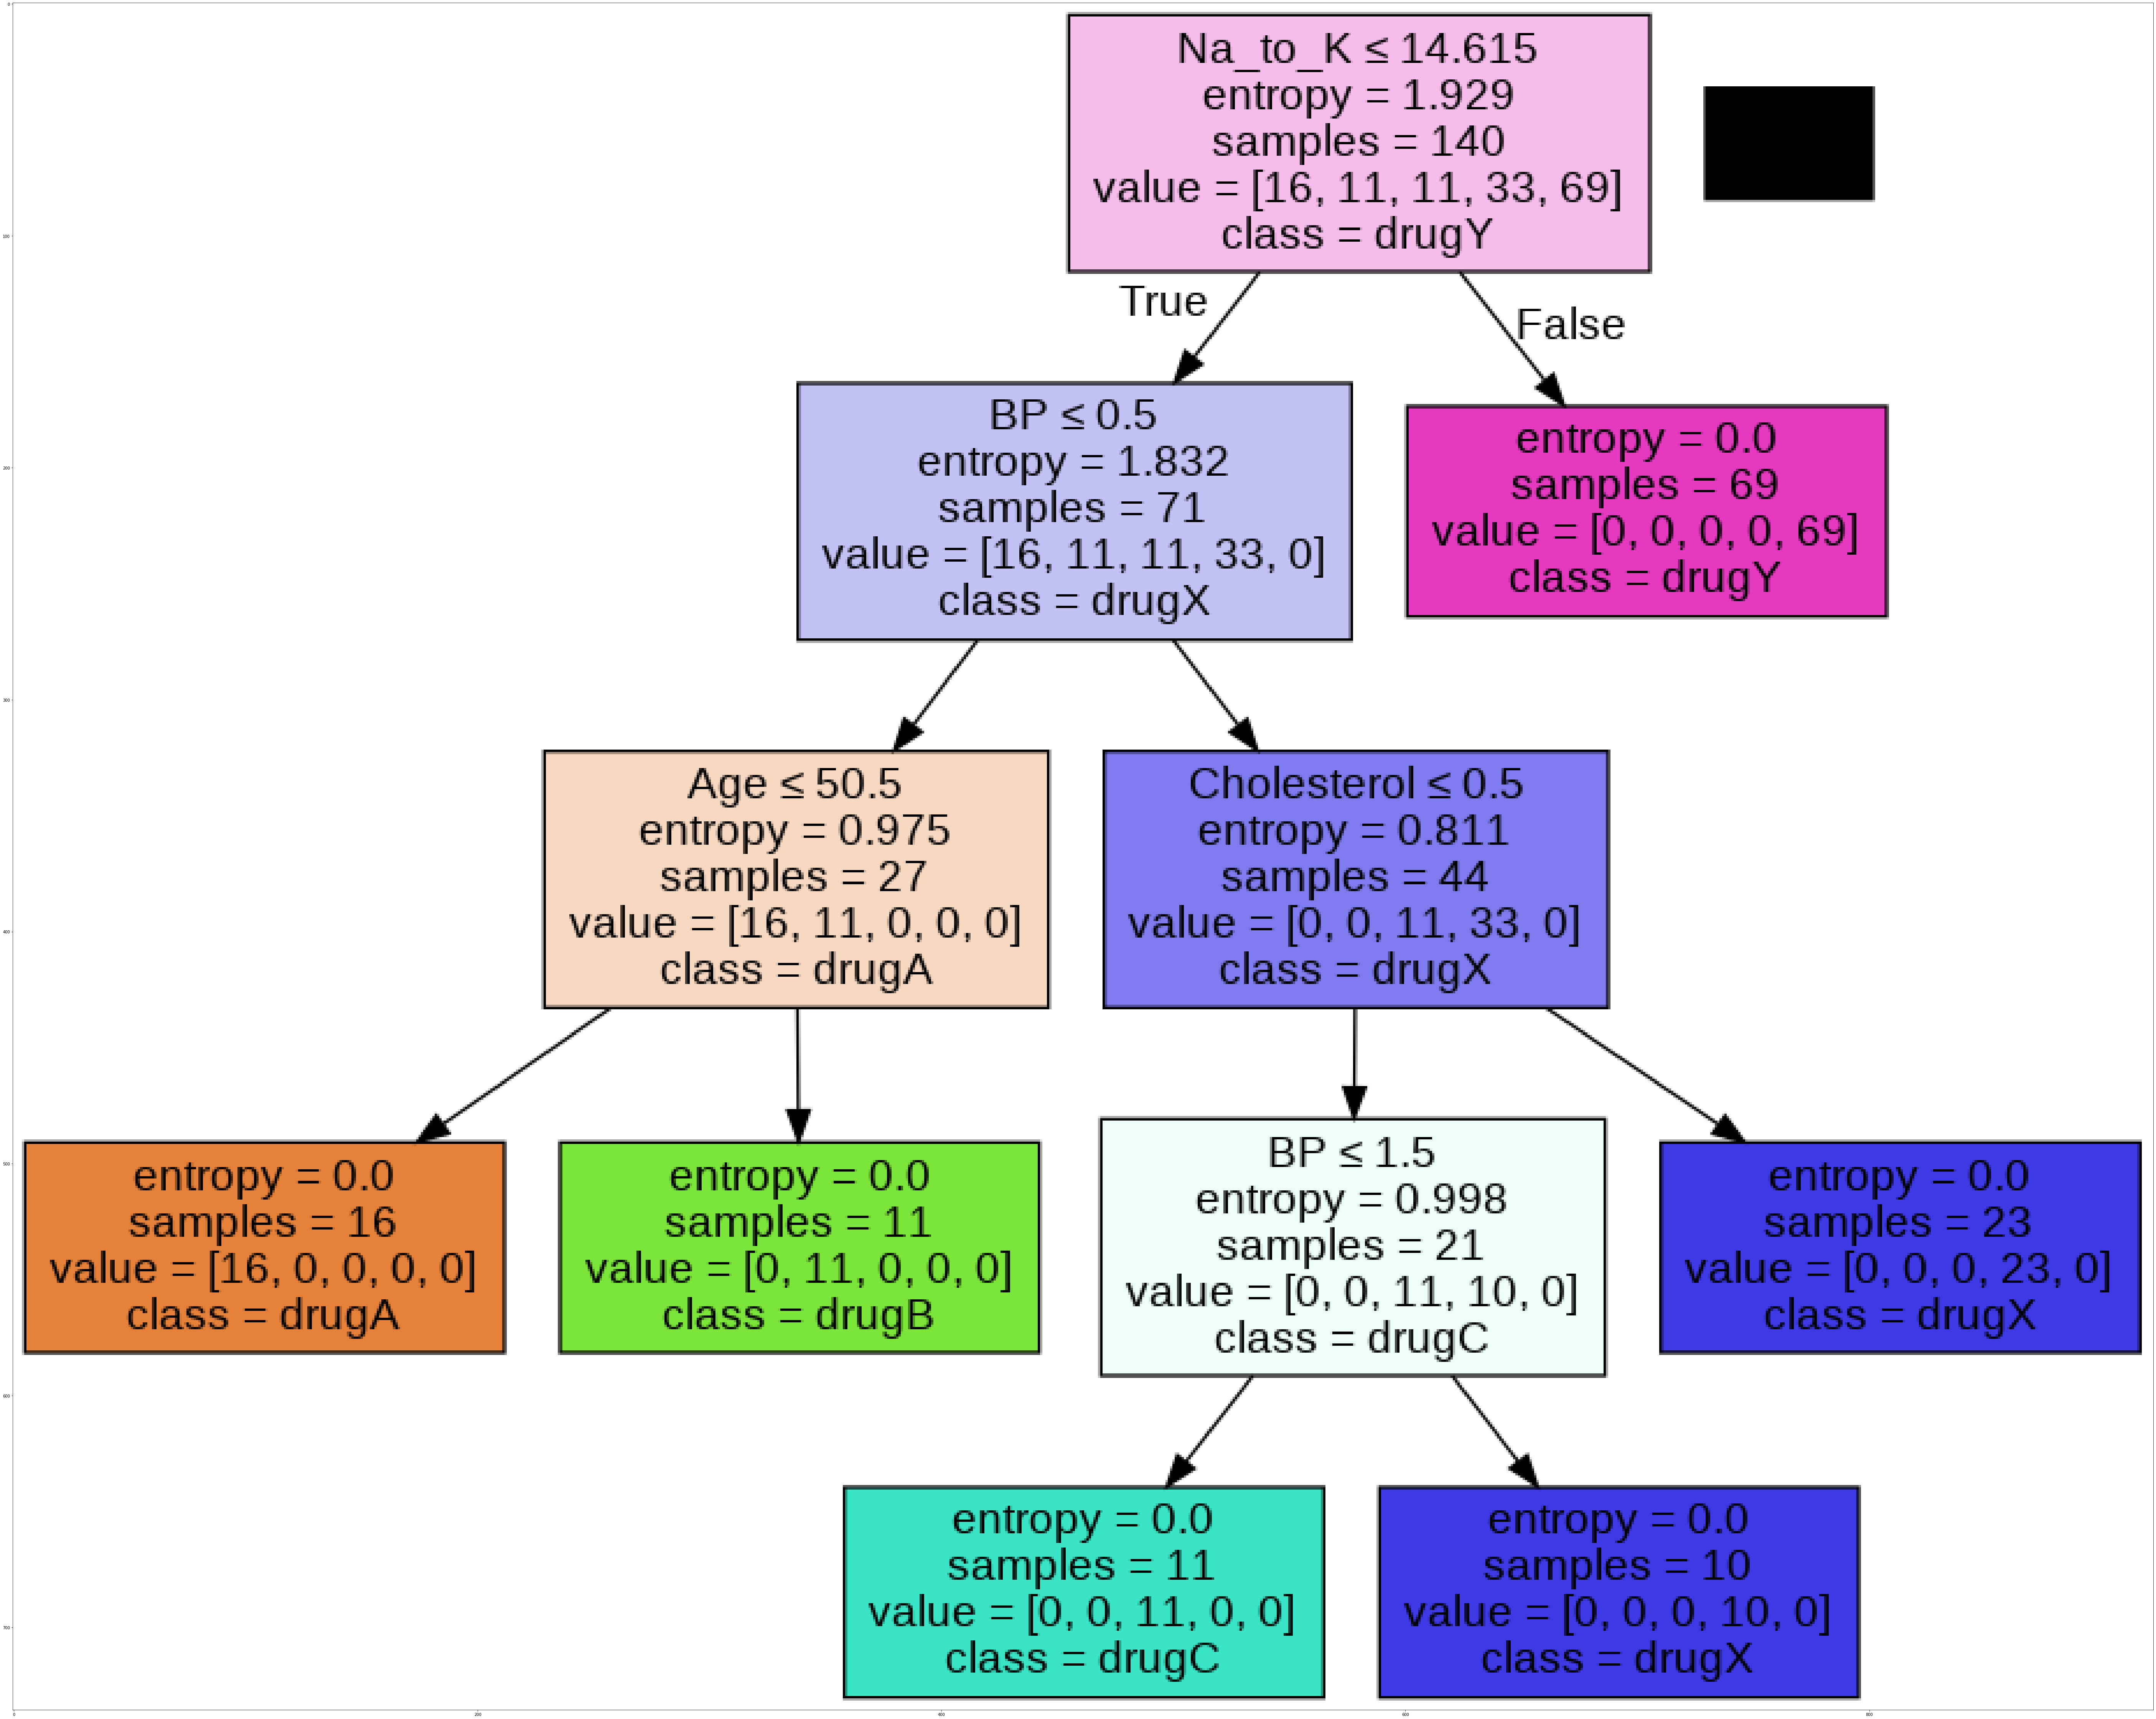

In [ ]:
dot_data = StringIO()
filename = "drugTree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out = tree.export_graphviz(drugTree, feature_names=featureNames, out_file = dot_data, class_names= np.unique(y_trainset), filled=True, special_characters = True, rotate=False ) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img,interpolation='nearest')

# Muchas gracias